# Downloading Data from Git

In [1]:
! curl -O https://raw.githubusercontent.com/gaylorav/NLPFinal/main/bg_descriptions.csv
! ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.1M  100 18.1M    0     0  10.5M      0  0:00:01  0:00:01 --:--:-- 10.5M
bg_descriptions.csv  sample_data


#Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('popular')
nltk.download('punkt_tab')
import re
from nltk import ngrams
from collections import defaultdict
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

# Selecting Relevant Columns From CSV -> PD

In [3]:
descriptions_df = pd.read_csv("bg_descriptions.csv", encoding="utf-8")
descriptions_df['sentiment'] = descriptions_df['sentiment'].astype(int)

print(len(descriptions_df))
descriptions_df.head()

15589


,id,description,usersrated,average,name,sentiment
0,13,"In CATAN (formerly The Settlers of Catan), pla...",132477,7.09526,CATAN,1
1,822,Carcassonne is a tile placement game in which ...,131182,7.41145,Carcassonne,1
2,30549,"In Pandemic, several virulent diseases have br...",128935,7.52913,Pandemic,1
3,68448,You are the leader of one of the 7 great citie...,107506,7.67463,7 Wonders,1
4,167791,"In the 2400s, mankind begins to terraform the ...",103923,8.35266,Terraforming Mars,1


# Analyzing Distribution of Board Game Ratings

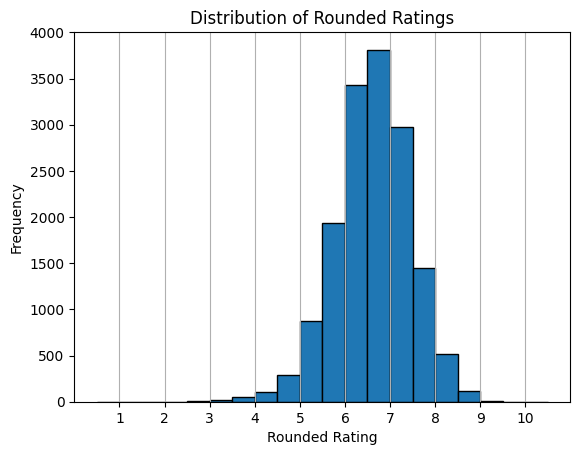

In [4]:
rounded_ratings = descriptions_df["average"]

# Plot the histogram
descriptions_df["average"].hist(bins=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5], edgecolor='black')
plt.xlabel("Rounded Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Rounded Ratings")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(axis='y')
plt.show()

In [5]:
stoplist = stopwords.words('english')
stoplist = stoplist + list(string.punctuation) + ["'s", "n't"]
stoplist = set(stoplist)

pattern = re.compile(r'^[^A-Za-z0-9\s]+$')

word_lens = []
words = []

for d in descriptions_df["description"]:
  d = nltk.word_tokenize(d)
  word_lens.append(len(d))
  for word in d:
    word = word.lower()
    if word not in stoplist and not pattern.match(word):
      words.append(word)

In [6]:
print(descriptions_df["usersrated"].median())
print(descriptions_df["usersrated"].mean())
print(sum(word_lens) / len(word_lens))
df_words = pd.Series(words).value_counts().reset_index()
df_words.columns = ['word', 'frequency']
df_words.head(50)
#df_words.to_csv('bg_word_counts.csv', index=False)
#from google.colab import files
#files.download('bg_word_counts.csv')  # replace with your file

337.0
1635.871896850343
229.9239207133235


,word,frequency
0,game,40040
1,players,26400
2,cards,22443
3,player,22073
4,one,17111
5,card,13809
6,play,9872
7,points,9230
8,new,7911
9,turn,7802


# RNN-LSTM Analysis

In [7]:
#More necessary imports
#Implement RNN using Keras
from sklearn.model_selection import train_test_split

import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [8]:
#check how data looks so we can compare later
print(descriptions_df['description'][0])

In CATAN (formerly The Settlers of Catan), players try to be the dominant force on the island of Catan by building settlements, cities and roads. On each turn dice are rolled to determine which resources the island produces. Players build structures by 'spending' resources (sheep, wheat, wood, brick and ore) which are represented by the relevant resource cards; each land type, with the exception of the unproductive desert, produces a specific resource: hills produce brick, forests produce wood, mountains produce ore, fields produce wheat, and pastures produce sheep. Set-up includes randomly placing large hexagonal tiles (each depicting one of the five resource-producing terrain types--or the desert) in a honeycomb shape and surrounding them with water tiles, some of which contain ports of exchange. A number disk, the value of which will correspond to the roll of two 6-sided dice, are placed on each terrain tile. Each player is given two settlements (think: houses) and roads (sticks) wh

In [9]:
#trying to sample data evenly (unbalanced data was causing issues, since about 2/3 of data was positive)
import pandas as pd

# Define how many samples per class
samples_per_class = 2000

# Optionally shuffle the DataFrame first to avoid any ordering bias
df = descriptions_df.sample(frac=1, random_state=42)
print(df.shape)

# Sample from each class
neg_samples = df[df["sentiment"] == -1].sample(n=samples_per_class, random_state=42)
neu_samples = df[df["sentiment"] == 0].sample(n=samples_per_class, random_state=42)
pos_samples = df[df["sentiment"] == 1].sample(n=samples_per_class, random_state=42)

# Concatenate them together
balanced_df = pd.concat([neg_samples, neu_samples, pos_samples])

# Shuffle again to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df["sentiment"].value_counts())
print(balanced_df.shape)


(15589, 6)
sentiment
-1    2000
 0    2000
 1    2000
Name: count, dtype: int64
(6000, 6)


### 1. Preprocess data for LSTM

In [10]:
#Clean up the text a little bit (normalize)
def clean(text):
  text = text.lower() #make text lowercase
  text = re.sub('[^a-zA-Z]',' ', text) #remove punctuation
  text = re.sub("\s+[a-zA-Z]\s+", ' ', text) #remove single letters (results from removing apostraphes, etc)
  text = re.sub(r'\s+', ' ', text) #remove extra spaces
  return text

descriptions = []
all_desc = list(balanced_df["description"])
for desc in all_desc:
  descriptions.append(clean(desc)) #clean each description

#Remove stopwords:
stoplist = stopwords.words('english')
stoplist = stoplist + list(string.punctuation) + ["'s", "n't"]
stoplist = set(stoplist)

pattern = re.compile(r'^[^A-Za-z0-9\s]+$')

word_lens = []
words = []

for d in descriptions:
  d = nltk.word_tokenize(d)
  word_lens.append(len(d))
  for word in d:
    word = word.lower()
    if word not in stoplist and not pattern.match(word):
      words.append(word)

In [11]:
#check that descriptions were formatted the way we intended:
print(descriptions[0])
print(balanced_df["sentiment"][0])

in this fun but luck intensive game players represent noble families trying to build up their neighborhoods and have their family members in high offices at the right times these goals are aided by cards which either aid families competing for high office or show buildings that can be placed in the neighborhoods at the end of each turn an event card takes effect giving points to officeholders allowing free building or causing some other occurrence layed out around the board during game setup these event cards are revealed to allow players to see the upcoming three events when all the event cards have taken effect players score points for their neighborhoods and for occupying high offices the player with the most points takes the day 
-1


In [12]:
#Split data before we continue working with it
#split data into 80 = train, 20 = temp
#split temp into 10 = validate, 10 = test

ratings = balanced_df['sentiment']
train_desc, temp_desc = train_test_split(descriptions, test_size=0.2, random_state=42)
train_rating, temp_rating = train_test_split(ratings, test_size=0.2, random_state=42)

val_desc, test_desc = train_test_split(temp_desc, test_size=0.5, random_state=42)
val_rating, test_rating = train_test_split(temp_rating, test_size=0.5, random_state=42)

In [13]:
#First step is padding all input to be the same length (necessary for RNN)
#So find longest description, and pad all other reviews to be the same length

#tokenizer.fit_on_texts will create a vocabulary from our descriptions
#vocab will be ordered by frequency (most frequent word will be "1", etc.)
#vocab is limited to top 5000 frequent words by default
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)

#each description is mapped onto the numbers corresponding to each word in the description
#(basically we turned our descriptions into numbers)
train_desc = tokenizer.texts_to_sequences(train_desc)
val_desc = tokenizer.texts_to_sequences(val_desc)
test_desc = tokenizer.texts_to_sequences(test_desc)

#define vocab length
VOCAB_LEN = len(tokenizer.word_index) + 1

#pad data so that each sequence is length of the longest description sequence
MAX_LEN = 250 #changed to average length of descriptions to avoid excessive padding that kept breaking the model
train_desc = pad_sequences(train_desc, maxlen=MAX_LEN, padding='post')
val_desc = pad_sequences(val_desc, maxlen=MAX_LEN, padding='post')
test_desc = pad_sequences(test_desc, maxlen=MAX_LEN, padding='post')


#one-hot encode sentiment categories
#i.e., if a game is "positively" rated, [0,0,1]
#first shift labels from -1,0,1 to 0,1,2
def one_hot(labels):
  for label in labels:
    label += 1
  labels = to_categorical(labels, num_classes=3)
  return labels

#train_sent = np.array([(rating + 1) for rating in train_rating])
#train_rating = to_categorical(train_sent, num_classes=3)

train_rating = one_hot(train_rating)
val_rating = one_hot(val_rating)
test_rating = one_hot(test_rating)


#check all variables and encodings worked:
print("vocab length:", VOCAB_LEN)
print("max length:", MAX_LEN)
print(train_desc[-5:])
print(train_rating[-5:])

#Check shape
print('Shape of training data: ')
print(train_desc.shape)
print(train_rating.shape)
print('Shape of test data: ')
print(test_desc.shape)
print(test_rating.shape)





vocab length: 34330
max length: 250
[[    5    33   552 ...     0     0     0]
 [    1   192     2 ...     0     0     0]
 [19840   399     2 ...     0     0     0]
 [  230     2   591 ...   109    21   111]
 [ 1685   133  3742 ...     0     0     0]]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Shape of training data: 
(4800, 250)
(4800, 3)
Shape of test data: 
(600, 250)
(600, 3)


### Defining and Training the Model

In [20]:
from tensorflow.keras.metrics import Recall, Precision

#define model
#input dimension:how many words the model can learn (should be our vocab size)
#output dimesnion: size of word embedding vector **************
#LSTM: argument is the number of LSTM units model has (does the learning part of the model)
#Dense: final output layer, arguments are num categories, softmax turns output into prob dist over categories (does actual classificaiton)

#Build model, need embedding layer (since we didn't embed the words ourselves), LSTM layer with 128 units,
# and dense layer that produces the output (hence 3 dimensions, one for each category)
# dense layer activated by softmax since we have multiple categories
model = Sequential()
model.add(Embedding(VOCAB_LEN, output_dim=100, trainable=True))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

#compile and train model
optimizer = keras.optimizers.RMSprop(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', Precision(), Recall()])
results = model.fit(train_desc, train_rating, epochs=5, batch_size=32, validation_data=(val_desc, val_rating))


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 444ms/step - accuracy: 0.3591 - loss: 1.0965 - precision_1: 0.1148 - recall_1: 6.8828e-04 - val_accuracy: 0.4100 - val_loss: 1.0801 - val_precision_1: 0.4965 - val_recall_1: 0.1167
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 85s 460ms/step - accuracy: 0.3933 - loss: 1.0846 - precision_1: 0.4973 - recall_1: 0.0495 - val_accuracy: 0.4117 - val_loss: 1.0786 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 493ms/step - accuracy: 0.3996 - loss: 1.0820 - precision_1: 0.6661 - recall_1: 0.0069 - val_accuracy: 0.4133 - val_loss: 1.0752 - val_precision_1: 0.7143 - val_recall_1: 0.0083
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 440ms/step - accuracy: 0.3949 - loss: 1.0777 - precision_1: 0.6369 - recall_1: 0.0371 - val_accuracy: 0.4317 - val_loss: 1.0682 - val_precision_1: 0.7000 - val_recall_1: 0.0117
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 467ms/step - accuracy: 0.3956 - loss: 1.0759 - precision_1: 

In [21]:
for key in results.history.keys():
  print(key)
  print(results.history[key])

accuracy
[0.37041667103767395, 0.3879166543483734, 0.398541659116745, 0.3960416615009308, 0.39500001072883606, 0.4033333361148834, 0.4168750047683716, 0.44083333015441895, 0.4670833349227905, 0.42395833134651184]
loss
[1.0924934148788452, 1.0868889093399048, 1.080283284187317, 1.0793629884719849, 1.0787409543991089, 1.070643663406372, 1.0629100799560547, 1.0503487586975098, 1.03523588180542, 1.052140712738037]
precision_1
[0.4000000059604645, 0.48188406229019165, 0.6134454011917114, 0.6350364685058594, 0.6868686676025391, 0.6349614262580872, 0.611328125, 0.6185410618782043, 0.6159029603004456, 0.676369845867157]
recall_1
[0.0033333334140479565, 0.027708332985639572, 0.015208333730697632, 0.036249998956918716, 0.028333334252238274, 0.05145833268761635, 0.0652083307504654, 0.08479166775941849, 0.09520833194255829, 0.08229167014360428]
val_accuracy
[0.4099999964237213, 0.4116666615009308, 0.41333332657814026, 0.43166667222976685, 0.3866666555404663, 0.41333332657814026, 0.4183333218097687

In [22]:
model.evaluate(test_desc, test_rating)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.4785 - loss: 1.0523 - precision_1: 0.5196 - recall_1: 0.0506


[1.0542705059051514,
 0.46166667342185974,
 0.5254237055778503,
 0.05166666582226753]

In [23]:
from sklearn.metrics import classification_report
# # check results:
y_pred = model.predict(test_desc)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(val_rating, axis=1)


print(classification_report(y_true, y_pred_classes, target_names=["negative", "neutral", "positive"]))
print(np.unique(np.argmax(y_pred, axis=1), return_counts=True))


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step
              precision    recall  f1-score   support

    negative       0.22      0.02      0.04       204
     neutral       0.33      0.61      0.42       198
    positive       0.33      0.34      0.33       198

    accuracy                           0.32       600
   macro avg       0.29      0.32      0.27       600
weighted avg       0.29      0.32      0.27       600

(array([0, 1, 2]), array([ 23, 369, 208]))
